## Import Modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import time
%matplotlib inline

## Data Image Preparation 

In [2]:
imagePaths = 'dataset\\daun-herbal\\'
label_list = ['sirih', 'seledri']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(200, 32, 32, 3)

In [5]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seled

## Label Binarizer

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

# 1: Sirih
# 0: Seledri

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

## Split Dataset

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (160, 32, 32, 3)
Ukuran data test = (40, 32, 32, 3)


## ANN Architecture Modelling

In [15]:
model = Sequential()
# input Layer: 32 size x 32 size x 3 rgb pixels flattened
model.add(Flatten(input_shape=(32, 32, 3)))   
model.add(Dense(1024, activation="relu"))   # 1st hidden layer
model.add(Dense(512, activation="relu"))  # 2nd hidden layer
model.add(Dense(1, activation="sigmoid"))  # output layer

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 3,672,065
Trainable params: 3,672,065
Non-trainable params: 0
_________________________________________________________________


In [17]:
# hyperparameter setting
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [18]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [19]:
times = time.time()
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)
print("Time taken: {:.1f} seconds".format(time.time() - times))

Epoch 1/100
5/5 [==============================] - 1s 128ms/step - loss: 3.9898 - accuracy: 0.5437 - val_loss: 0.7465 - val_accuracy: 0.4750
Epoch 2/100
5/5 [==============================] - 0s 50ms/step - loss: 0.9064 - accuracy: 0.5562 - val_loss: 0.6746 - val_accuracy: 0.5250
Epoch 3/100
5/5 [==============================] - 0s 48ms/step - loss: 0.6680 - accuracy: 0.5375 - val_loss: 0.5663 - val_accuracy: 0.6250
Epoch 4/100
5/5 [==============================] - 0s 50ms/step - loss: 0.5605 - accuracy: 0.6625 - val_loss: 0.5050 - val_accuracy: 0.7250
Epoch 5/100
5/5 [==============================] - 0s 48ms/step - loss: 0.4693 - accuracy: 0.8062 - val_loss: 0.3720 - val_accuracy: 0.9000
Epoch 6/100
5/5 [==============================] - 0s 55ms/step - loss: 0.3526 - accuracy: 0.9125 - val_loss: 0.2879 - val_accuracy: 0.9500
Epoch 7/100
5/5 [==============================] - 0s 50ms/step - loss: 0.2799 - accuracy: 0.9250 - val_loss: 0.2320 - val_accuracy: 0.9500
Epoch 8/100
5/5 [==

5/5 [==============================] - 0s 52ms/step - loss: 0.0123 - accuracy: 0.9937 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 60/100
5/5 [==============================] - 0s 54ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2078 - val_accuracy: 0.9250
Epoch 61/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9750
Epoch 62/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 0.9750
Epoch 63/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1384 - val_accuracy: 0.9750
Epoch 64/100
5/5 [==============================] - 0s 52ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.1154 - val_accuracy: 0.9750
Epoch 65/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9750
Epoch 66/100
5/5 [========

## Model Evaluation

In [20]:
# check acccuracy model for data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

       sirih       1.00      0.95      0.97        19
     seledri       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



<ipython-input-20-b6245a92792e>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


## Model Visualize

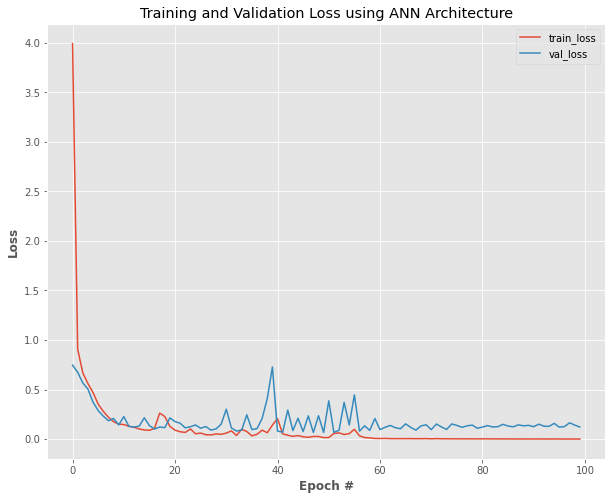

In [21]:
# Plot Training and Validation Loss

N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss using ANN Architecture")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

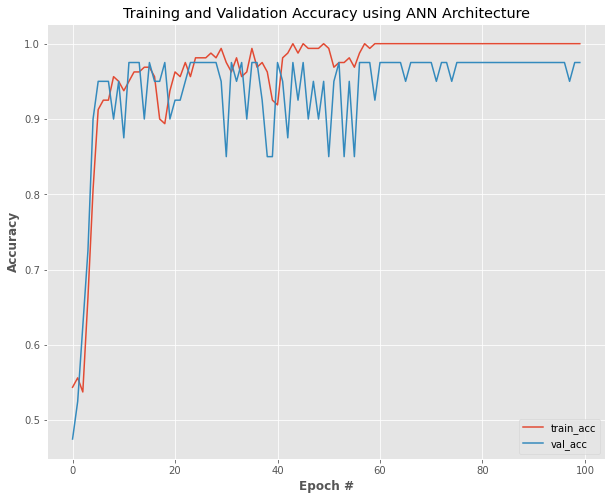

In [22]:
# Plot Training and Validation Accuracy

N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy using ANN Architecture")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

## Check Model

In [27]:
queryPath = imagePaths + 'check_seledri.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[1.0902692e-06]]


In [28]:
if q_pred<=0.5 :
    target = "Seledri"
else :
    target = "Sirih"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
cv2.imshow('Output', output)
cv2.waitKey() 
cv2.destroyWindow('Output')

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Output' in function 'cvDestroyWindow'
